In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

import pickle
import os

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data
1 - Positive

2 - Neutral

3 - Negative

In [3]:
dataset_path = "Data/news_headlines_data.csv"

In [4]:
df = pd.read_csv(dataset_path)
df = df.iloc[:, [0, 2]]
print(df['Headlines'][4])

Tesla shares have fallen 28% since Elon Musk took over Twitter, lagging other carmakers


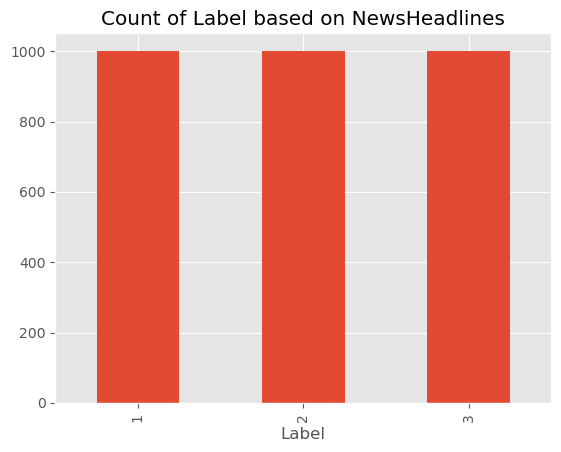

In [5]:
ax = df['Label'].value_counts().sort_index().plot(kind='bar', title="Count of Label based on NewsHeadlines").figsize=(10, 5)


# Preprocessing
## lowercase, remove stopwords, remove punctuation

In [6]:
def lemmatize_word(word, pos_tag):
    # map NLTK POS tags to WordNet POS tags
    pos_map = {
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'J': wordnet.ADJ,
        'R': wordnet.ADV
    }
    # lemmatize the word
    pos = pos_map.get(pos_tag[0], wordnet.NOUN)
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word, pos)

def remove_punctuation(text):
  # replace punctuation marks with an empty string
  from string import punctuation
  punctuation += '’'
  translator = str.maketrans('', '', punctuation)
  return text.translate(translator)

In [7]:
def preprocess_text(df_column:pd.core.series.Series):

  stopwords_list = set(stopwords.words('english'))

  # remove stop words
  df_column = df_column.apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stopwords_list]))
  # remove punctuation
  df_column = df_column.apply(remove_punctuation)
  # tokenize and apply POS tagging and lemmatization
  df_column = df_column.apply(lambda x: ' '.join([lemmatize_word(word, tag) for word, tag in pos_tag(word_tokenize(x))]))

  return df_column

In [8]:
df['Headlines'] = preprocess_text(df['Headlines'])

In [9]:
print("After Preprocessing:")
print(df['Headlines'][3:7])

After Preprocessing:
3    apple stock touch alltime high amid big plan d...
4    tesla share fall 28 since elon musk take twitt...
5    meta stock jump company report first revenue g...
6    strange thing return boost netflix subscriber ...
Name: Headlines, dtype: object


# Training

In [10]:
x = df['Headlines']
y = df['Label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 17, shuffle = True)

train_headlines = x_train
test_headlines = x_test

In [11]:
# implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(1,2))
traindataset=countvector.fit_transform(train_headlines)

In [12]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=450,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=450)

In [13]:
## Predict for the Test Dataset
test_transform= []
test_transform = test_headlines
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

# Compute Accuracy based on test dataset

In [14]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
# CONFUSION MATRIX
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[126  47  20]
 [ 60 133  11]
 [ 54  20 130]]
0.6472545757071547
              precision    recall  f1-score   support

           1       0.53      0.65      0.58       193
           2       0.67      0.65      0.66       204
           3       0.81      0.64      0.71       204

    accuracy                           0.65       601
   macro avg       0.67      0.65      0.65       601
weighted avg       0.67      0.65      0.65       601



In [ ]:
# import pickle

# # Assuming you have a trained RandomForestClassifier model called 'model'
# model = randomclassifier

# # Save the model to a file
# filename = 'random_forest_model.pkl'
# with open(filename, 'wb') as file:
#     pickle.dump(model, file)


# main

In [16]:
# specify the paths to your model and CountVectorizer files
model_path = "Model/random_forest_model.pkl"
vectorizer_path = "Model/countvector.pkl"

# load the trained model
with open(model_path, "rb") as f:
    model = pickle.load(f)

# load the trained CountVectorizer
with open(vectorizer_path, "rb") as f:
    countvector = pickle.load(f)

c:\Users\aiman\anaconda3\envs\tfgpu210\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [ ]:
import gradio as gr

def predict(news_headlines):
    d = {'headline': [news_headlines]}
    temp_df = pd.DataFrame(data=d)
    temp_df['headline'] = preprocess_text(temp_df['headline'])


    preprocessed_text = temp_df['headline'][0]

    news_headline_vector = countvector.transform(temp_df['headline'])
    predictions = model.predict(news_headline_vector)


    output = ''
    if predictions == 1:
        output = "Positive"
    elif predictions == 3:
        output = "Negative"
    else:
        output = "Neutral"



    return preprocessed_text, output

demo = gr.Interface(
    fn=predict,
    inputs=gr.Textbox(lines=2, placeholder="News Headline Here..."),
    outputs=["text", "text"]
)
demo.launch()


Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


In [21]:
'''
SHORT TEST DATA

Tesla stock rises again, for record 12-day win streak
Twitter’s Stock Falls Further as Doubts Swirl Over Musk’s Takeover
Is Apple Stock a Buy Near $185?
'''

'\nTEST DATA\nTesla stock rises again, for record 12-day win streak\nTwitter’s Stock Falls Further as Doubts Swirl Over Musk’s Takeover\nIs Apple Stock a Buy Near $185?\n'